# Projet 4 

## Description 

Étude de la mal nutrition dans le monde à partir de 4 fichiers csv contenant des données de 2013 à 2017.

La premiere partie de cette étude est concacré à l'année 2017


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [59]:
aide_alimentaire = pd.read_csv('CSV/aide_alimentaire.csv')
sous_nutrition = pd.read_csv('CSV/sous_nutrition.csv')
dispo_alimentaire = pd.read_csv('CSV/dispo_alimentaire.csv')
population = pd.read_csv('CSV/population.csv')

In [84]:
#display(aide_alimentaire.head())
#display(sous_nutrition.head())
#display(dispo_alimentaire.head())
#display(population.head())



On a fait le choix de prendre 0.1 million de personne en sous nutrition pour les pays <0.1

In [97]:
sous_nutrition.loc[sous_nutrition['Valeur'] == '<0.1', 'Valeur'] = '0.1'
sous_nutrition['Valeur'] = sous_nutrition["Valeur"].astype(float)
sous_nutrition["Valeur"].fillna(value=0, inplace=True)
sous_nutrition_2017 = sous_nutrition.loc[(sous_nutrition['Année']=='2016-2018'),:]
total_sous_nutrition_2017 = sous_nutrition_2017['Valeur'].sum()
population_2017 = round(population.loc[population['Année']== 2017 ,'Valeur'].sum(),) * 1000
proportion_malnutrition_2017 = round((total_sous_nutrition_2017 * 1000000) / population_2017,3)


print("En 2017, la poopulation total etait de",population_2017,"et la quantitée de personne sous nourris etait de",total_sous_nutrition_2017,"ce qui fait qu'en 2017",proportion_malnutrition_2017*100,"% de la population était mal nourris")

En 2017, la poopulation total etait de 7548134000 et la quantitée de personne sous nourris etait de 537.7 ce qui fait qu'en 2017 7.1 % de la population était mal nourris


Il faut en moyenne 2500Kcal/personne/jour 

In [87]:
dispoAlimMondial = pd.merge(dispo_alimentaire[["Zone","Disponibilité alimentaire (Kcal/personne/jour)","Origine"]],population.loc[population["Année"]==2017,["Zone","Valeur"]],how='left',on='Zone')
dispoAlimMondial["dispo_Kcal"] = dispoAlimMondial["Disponibilité alimentaire (Kcal/personne/jour)"] * dispoAlimMondial["Valeur"] * 365
totalKcalHumain = round((dispoAlimMondial["dispo_Kcal"].sum()*1000)/(2500*365),)
print(totalKcalHumain,"humains peuvent etre nourris")
propTotalKcalHumain = round((totalKcalHumain*100)/ (population_2017),1)
print("soit une proportion de ",propTotalKcalHumain,"%")


8367593851 humains peuvent etre nourris
soit une proportion de  110.9 %


In [88]:
dispoAlimMondialVege = dispoAlimMondial.loc[dispoAlimMondial["Origine"]=="vegetale"]
totalKcalHumainVege = round((dispoAlimMondialVege["dispo_Kcal"].sum()*1000)/(2500*365),)
print(totalKcalHumainVege,"humains peuvent etre nourris avec de la nourriture vegetal")
propTotalKcalHumainVege = round((totalKcalHumainVege*100)/ (population_2017),1)
print("soit une proportion de ",propTotalKcalHumainVege,"%")

6904305685 humains peuvent etre nourris avec de la nourriture vegetal
soit une proportion de  91.5 %


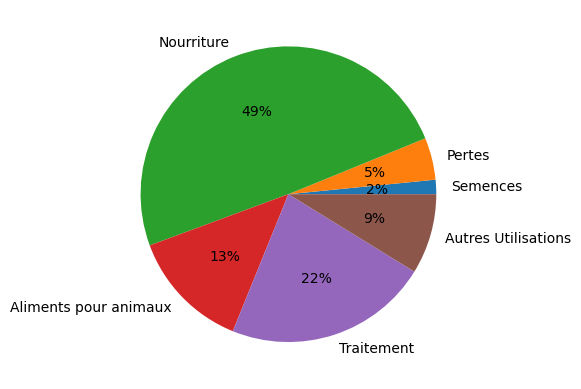

In [73]:
liste = ['Semences','Pertes','Nourriture','Aliments pour animaux',"Traitement","Autres Utilisations"]
liste2 = []
for variable in liste:
    a = dispo_alimentaire[variable].sum()
    liste2.append(a)
df1 = pd.DataFrame(liste2, index=liste, columns=["Totaux1"])
graphPie1 = plt.pie(x=df1["Totaux1"], labels=liste, autopct='%.0f%%')



Proportion de personnes sous alimenté la plus forte

In [ ]:
sousNutrition2017 = sous_nutrition.loc[sous_nutrition['Année']=='2016-2018',:]
sousNutrition2017.rename(columns={'Valeur' : 'Population sous alimenté'}, inplace=True)
popu2017 = population.loc[population["Année"]==2017,["Zone","Valeur"]]
popu2017.rename(columns={'Valeur' : "Population"}, inplace=True)


proportionSousAlimentées = pd.merge(sousNutrition2017, popu2017, on="Zone",how="left")
proportionSousAlimentées["Population sous alimenté"] = (proportionSousAlimentées["Population sous alimenté"])*1000000
proportionSousAlimentées["Population"] = proportionSousAlimentées["Population"] * 1000
proportionSousAlimentées['Proportion'] = round((proportionSousAlimentées["Population sous alimenté"]) / (proportionSousAlimentées["Population"]),3)
proportionSousAlimentées.sort_values("Proportion", ascending=False)


/var/folders/9z/twqnyxm936n71h0b6v7yr8vh0000gn/T/ipykernel_99942/1784069596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sousNutrition2017.rename(columns={'Valeur' : 'Population sous alimenté'}, inplace=True)


,Zone,Année,Population sous alimenté,Population,Proportion
51,Dominique,2016-2018,100000.0,71458.0,1.399
164,Saint-Vincent-et-les Grenadines,2016-2018,100000.0,109827.0,0.911
98,Kiribati,2016-2018,100000.0,114158.0,0.876
167,Sao Tomé-et-Principe,2016-2018,100000.0,207089.0,0.483
78,Haïti,2016-2018,5300000.0,10982366.0,0.483
...,...,...,...,...,...
75,Guinée équatoriale,2016-2018,0.0,1262002.0,0.000
74,Guinée,2016-2018,0.0,12067519.0,0.000
72,Groenland,2016-2018,0.0,56481.0,0.000
71,Grenade,2016-2018,0.0,110874.0,0.000


Beneficiaire d'aide alimentaire

In [ ]:

aide = aide_alimentaire[["Pays bénéficiaire", "Valeur"]].groupby(["Pays bénéficiaire"]).sum()
aide.sort_values("Valeur", ascending=False).head()



,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784


Disponibilité/habitant 

In [ ]:
dispoAlimentaire2013 = dispo_alimentaire.groupby(["Zone"]).sum("Disponibilité alimentaire (Kcal/personne/jour)")
dispoAlimentaire2013 = dispoAlimentaire2013[["Disponibilité alimentaire (Kcal/personne/jour)"]]
dispoAlimentaire2013 = dispoAlimentaire2013.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)
popu2013 = population.loc[population["Année"]==2013,["Zone","Valeur"]]
dispHabitant = pd.merge(dispoAlimentaire2013, popu2013, on='Zone', how='left')
dispHabitant.rename(columns={'Valeur' : "Population (en millier d'habitants)"})

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population (en millier d'habitants)
0,Autriche,3770.0,8556.189
1,Belgique,3737.0,11154.009
2,Turquie,3708.0,75925.462
3,États-Unis d'Amérique,3682.0,316400.538
4,Israël,3610.0,7734.841
...,...,...,...
169,Haïti,2089.0,10400.675
170,Afghanistan,2087.0,32269.589
171,Madagascar,2056.0,22961.255
172,Zambie,1924.0,14926.544


aide_alimentaire.loc[aide_alimentaire["Année"]==2016].groupby(["Produit","Année"]).sum([["Valeur"]])

Repartiton des cereales

/var/folders/9z/twqnyxm936n71h0b6v7yr8vh0000gn/T/ipykernel_99942/402805223.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_cereal["dispo"] = dispo_cereal[["Produit"]].isin(ListeCerealnew)


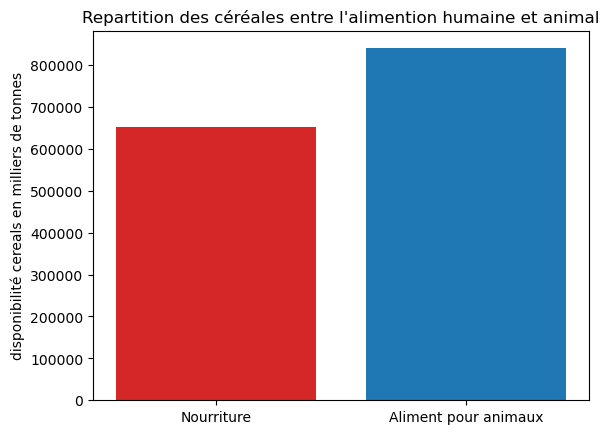

In [83]:
FaoCereal = pd.read_csv("CSV/FaoCereal.csv")
ListeCereal = FaoCereal.iloc[:,7]
ListeCereal = ListeCereal.unique()
ListeCereal = ListeCereal.tolist()
ListeCerealnew = []
for mot in ListeCereal :
    if mot[len(mot)-11:] == "et produits":
        ListeCerealnew.append(mot[:len(mot)-12])
    else :
        ListeCerealnew.append(mot)

dispo_cereal = dispo_alimentaire[["Produit","Nourriture","Aliments pour animaux"]]
dispo_cereal["dispo"] = dispo_cereal[["Produit"]].isin(ListeCerealnew)
dispo_cereal = dispo_cereal.loc[dispo_cereal["dispo"]==True]

type =  ["Nourriture","Aliment pour animaux"]
repartition = [dispo_cereal['Nourriture'].sum(),dispo_cereal['Aliments pour animaux'].sum()]
bar_colors = ['tab:red','tab:blue']

plt.bar(type,repartition,label=type, color=bar_colors)
plt.ylabel('disponibilité cereals en milliers de tonnes')
plt.title("Repartition des céréales entre l'alimention humaine et animal")
plt.show()


Manioc